In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_excel('TESTE_FRAME_SOLDAGEM_ETAPA_002_J.xls')

In [8]:
df.head()

,Tempo,Amperagem,Situação
0,09:24:50,0,parado
1,09:24:51,0,parado
2,09:24:52,0,parado
3,09:24:53,0,parado
4,09:24:54,0,parado


In [9]:
df = df.drop([0,1,2,3])

In [10]:
df = df.loc[df['Amperagem'] < 500]

In [11]:
df['Tempo'] = pd.to_datetime(df['Tempo']).dt.strftime('%H:%M:%S')

In [12]:
dff = df
dff = dff.reset_index() # Gráfico Scatter
situacao = df['Situação'].value_counts() # gráfico de barras para ver o tempo parado ou trabalhando

In [13]:
sec = df.shape[0]

In [14]:
minuto = sec / 60

In [15]:
hora = minuto // 60
hora = int(hora)

In [16]:
modulo = minuto % 60
modulo = int(modulo)

In [17]:
total = f"Total={hora}hora/s:{modulo}minutos"

In [18]:
#Criando linhas de referência  (+10%) (-10%)
arc = int(input("Qual valor da corrente utilizado?"))
porc = arc * 0.10
linhamax = arc + porc
linhamin = arc - porc

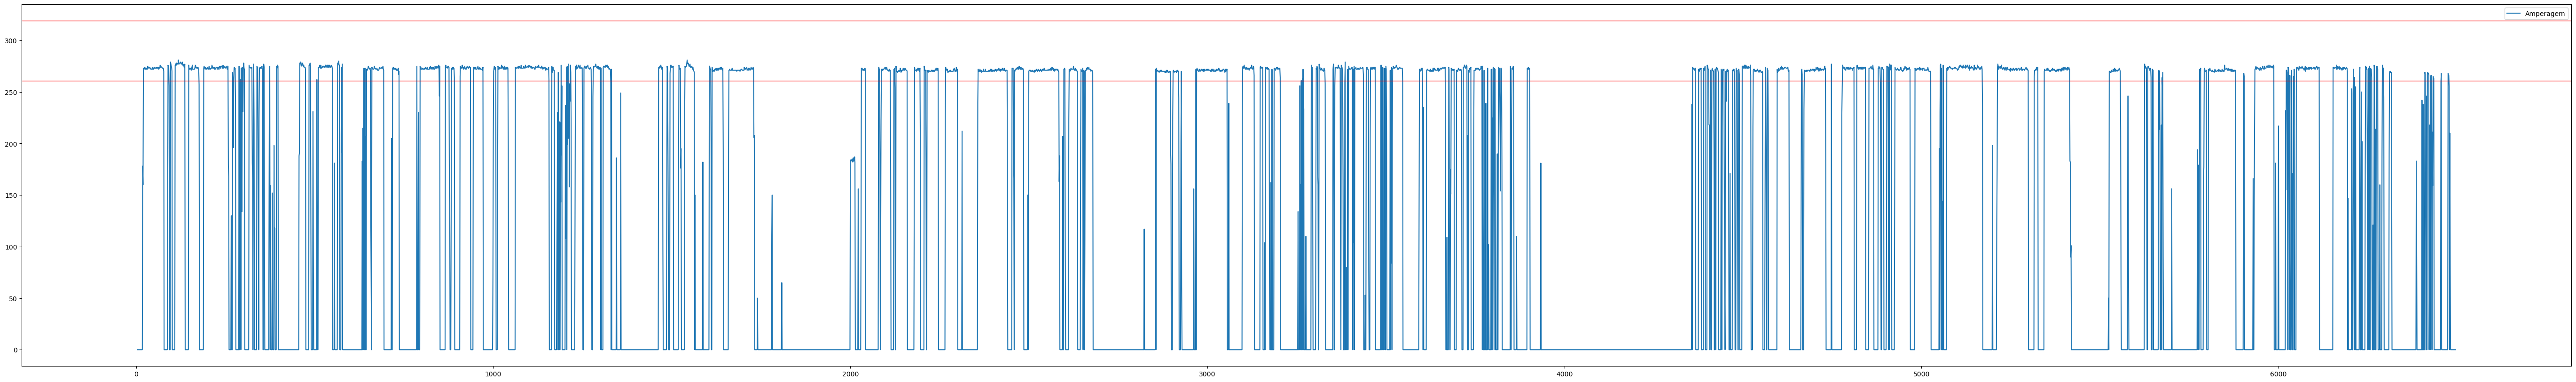

In [19]:
#Plotando gráficos de linha
df.plot(figsize=(70,10))
plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})      
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})
plt.show()

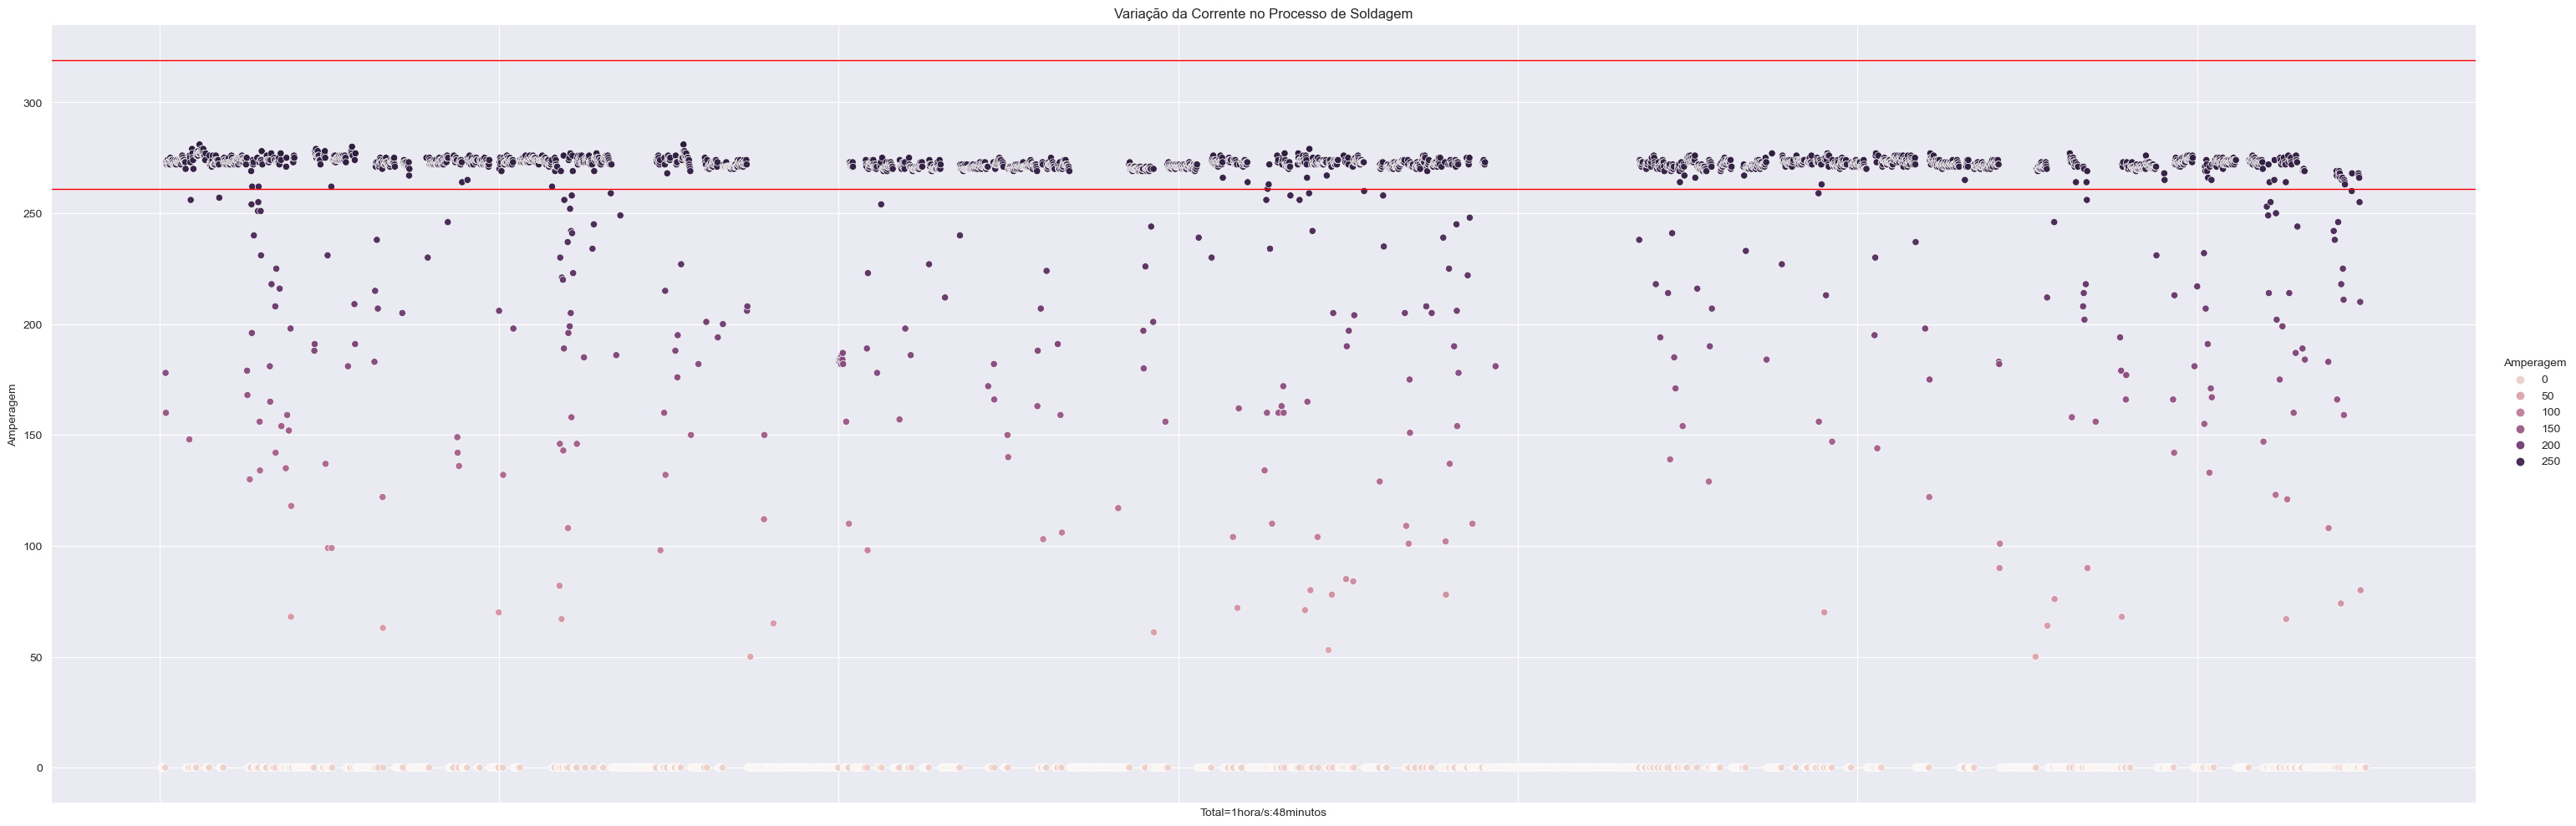

In [20]:
#Plotando gráficos de disperção
sns.set_style('darkgrid')
sns.relplot(data=dff, x='index', y='Amperagem', aspect = 3, height = 10, hue='Amperagem')

plt.title('Variação da Corrente no Processo de Soldagem')
plt.xlabel(total)

plt.axhline(linhamax,0,1, color = 'r', **{'lw':1})
plt.axhline(linhamin,0,1, color = 'r', **{'lw':1})
plt.tick_params(labelbottom = False)

plt.show()

In [21]:
run = df.loc[df['Situação'] == 'trabalhando']
stop= df.loc[df['Situação'] == 'parado']

In [22]:
run['Situação']=run['Situação'].replace('trabalhando',1)
stop['Situação'] = stop['Situação'].replace('parado',1)

C:\Users\pedro.prado\AppData\Local\Temp\ipykernel_9500\469729715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  run['Situação']=run['Situação'].replace('trabalhando',1)
C:\Users\pedro.prado\AppData\Local\Temp\ipykernel_9500\469729715.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stop['Situação'] = stop['Situação'].replace('parado',1)


In [23]:
run1 = run['Situação'].sum()

In [24]:
minuto = run1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalrun1 = f"Arco aberto = {hora}hora/s:{modulo}minutos"


In [25]:
stop1 = stop['Situação'].sum()

In [26]:
minuto = stop1 / 60

hora = minuto // 60
hora = int(hora)

modulo = minuto % 60
modulo = int(modulo)
totalstop1 = f"Arco fechado = {hora}hora/s:{modulo}minutos"


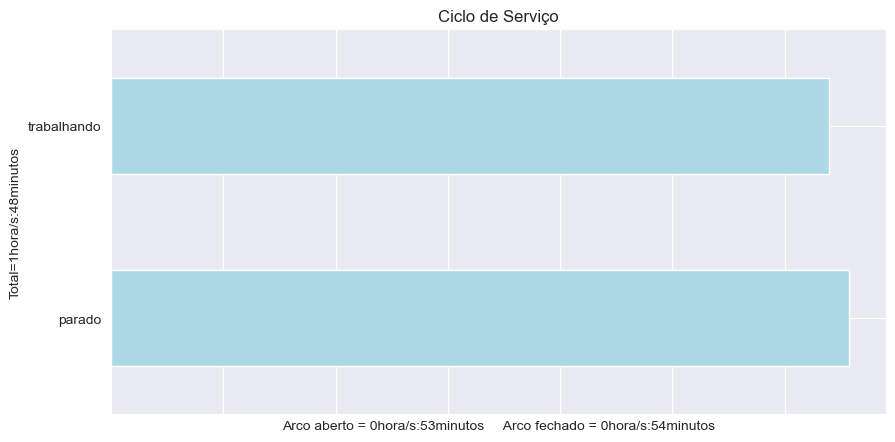

In [27]:
#Plotando gráfico de barras conforme situação
situacao.plot(kind='barh', title = 'Ciclo de Serviço', figsize=(10,5),color='lightblue')
plt.ylabel(f"{total}")
plt.xlabel(f"{totalrun1}     {totalstop1}")
plt.tick_params(labelbottom = False)
plt.show()